In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure





%matplotlib inline 
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
movies = pd.read_csv(r'movies.csv')
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
# first we check the data 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
movies.drop_duplicates()


# it seems that we have some missing data: 
#let's check them:

#for missing in score, votes, budget, and gross - we substitute 0 when data is missing 


movies['score'].fillna(0, inplace=True)
movies['votes'].fillna(0, inplace=True)
movies['budget'].fillna(0, inplace=True)
movies['gross'].fillna(0, inplace=True)
movies['released'].fillna(str(movies['year']), inplace=True)


#for writer and country we look for the missing data and do research to fill the data


movies.loc[1820,'writer'] = 'Bruce Edwards' 
movies.loc[5834,'writer'] = 'Steve Coogan'

movies[movies['country'].isnull()]
movies.loc[5728,'country'] = 'United States'
movies.loc[5730,'country'] = 'United States'
movies.loc[7615,'country'] = 'United States'

# also, it seems that we have some negative values for gross (probably because of conversion error): 
# we replace them with the values we found from research

movies.loc[5445,'gross'] = 2847246203
movies.loc[3045,'gross'] = 2202000000
movies.loc[7445,'gross'] = 2797000000

In [8]:
# it seems that for some rows, year in the release does not match year 
# so, we fix them

def yearsplit (string):
    if len(string.split(','))>1:
        return string.split(',')[1].split('(')[0]
    else:
        return string.split(',')[0]


movies.loc [:,'year'] = movies['released'].apply(yearsplit)

In [9]:
movies['gross'] = movies['gross'].astype('int64')
movies[movies.gross>0].sort_values('gross',ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2797000000,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2202000000,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2001,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,0.0,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,0.0,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2020,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,0.0,682,Roxwell Films,93.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,596,DENTSU Music And Entertainment,134.0


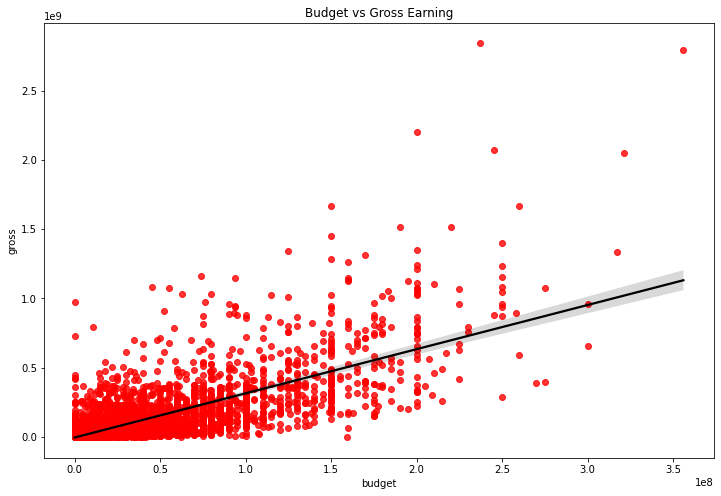

In [10]:
# find correlation of Gross Earning with a random column (budget)

plt.scatter(x=movies['budget']/1000000,y=movies['gross']/1000000)

plt.title('Budget vs Gross Earning')
plt.xlabel('Gross Earning (in $M)')
plt.ylabel('Budget for Film (in $M)')
sns.regplot(x=movies['budget'],y=movies['gross'],scatter_kws = {'color':'red'},line_kws = {'color':'black'})
plt.show()

In [11]:
#find the correlation of gross earning with all columns
# first categorize the columns
movies_num = movies
for col in movies_num.columns:
    if movies_num [col].dtype == 'object':
        movies_num [col] = movies_num [col].astype('category')
        movies_num [col] = movies_num [col].cat.codes

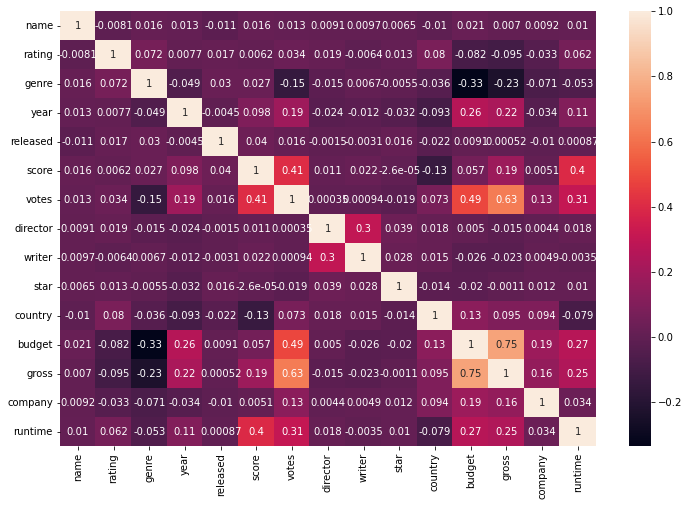

In [32]:
correlation_mat = movies_num.corr()

sns.heatmap(correlation_mat, annot = True)



In [44]:
# and now find the pairs with high correlation
correlation = movies_num.corr().unstack().sort_values()
high_correlation = correlation [(correlation>0.4) & (correlation!= 1)]
high_correlation

votes   score     0.407101
score   votes     0.407101
budget  votes     0.486931
votes   budget    0.486931
gross   votes     0.632871
votes   gross     0.632871
budget  gross     0.750157
gross   budget    0.750157
dtype: float64

gross   votes     0.632871
votes   gross     0.632871
budget  gross     0.750157
gross   budget    0.750157
dtype: float64